### PHASE 1: Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
files.upload()

Saving advertising.csv to advertising.csv


{'advertising.csv': b'TV,Radio,Newspaper,Sales\r\n230.1,37.8,69.2,22.1\r\n44.5,39.3,45.1,10.4\r\n17.2,45.9,69.3,12\r\n151.5,41.3,58.5,16.5\r\n180.8,10.8,58.4,17.9\r\n8.7,48.9,75,7.2\r\n57.5,32.8,23.5,11.8\r\n120.2,19.6,11.6,13.2\r\n8.6,2.1,1,4.8\r\n199.8,2.6,21.2,15.6\r\n66.1,5.8,24.2,12.6\r\n214.7,24,4,17.4\r\n23.8,35.1,65.9,9.2\r\n97.5,7.6,7.2,13.7\r\n204.1,32.9,46,19\r\n195.4,47.7,52.9,22.4\r\n67.8,36.6,114,12.5\r\n281.4,39.6,55.8,24.4\r\n69.2,20.5,18.3,11.3\r\n147.3,23.9,19.1,14.6\r\n218.4,27.7,53.4,18\r\n237.4,5.1,23.5,17.5\r\n13.2,15.9,49.6,5.6\r\n228.3,16.9,26.2,20.5\r\n62.3,12.6,18.3,9.7\r\n262.9,3.5,19.5,17\r\n142.9,29.3,12.6,15\r\n240.1,16.7,22.9,20.9\r\n248.8,27.1,22.9,18.9\r\n70.6,16,40.8,10.5\r\n292.9,28.3,43.2,21.4\r\n112.9,17.4,38.6,11.9\r\n97.2,1.5,30,13.2\r\n265.6,20,0.3,17.4\r\n95.7,1.4,7.4,11.9\r\n290.7,4.1,8.5,17.8\r\n266.9,43.8,5,25.4\r\n74.7,49.4,45.7,14.7\r\n43.1,26.7,35.1,10.1\r\n228,37.7,32,21.5\r\n202.5,22.3,31.6,16.6\r\n177,33.4,38.7,17.1\r\n293.6,27.7,1.8,20

In [ ]:
'''
Dataset Description :
Each row of the dataset represents an advertising campaign with spending amounts (in thousands) across TV, Radio, and Newspaper,
and the resulting product Sales (in thousands of units).
'''

In [4]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### PHASE 2: Data Understanding & Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [7]:
#Statistical Summary of the dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
#Finding missing values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


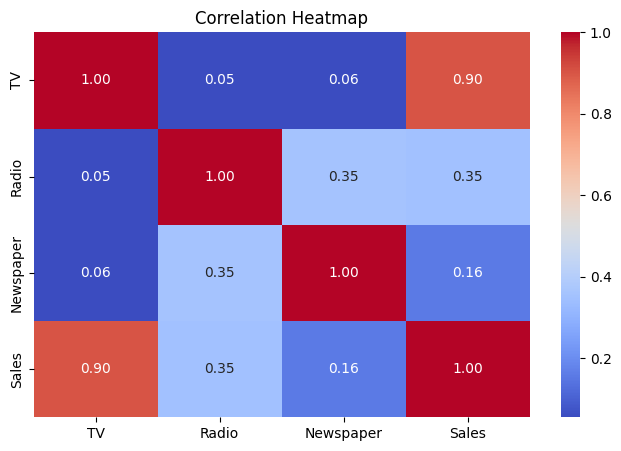

In [9]:
# Correlation Matrix
correlation = df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


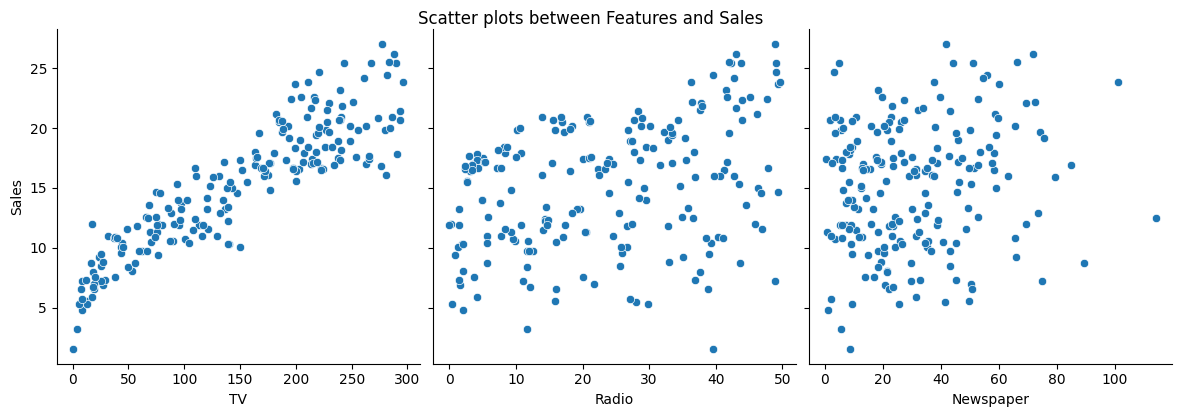

In [10]:
# Pairplot to visualize relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Scatter plots between Features and Sales", y=1.02)
plt.show()


### PHASE 3: Feature Engineering and Data Splitting

In [11]:
# Features
X = df[['TV', 'Radio', 'Newspaper']]

# Target
y = df['Sales']

# shape
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (200, 3)
Target shape: (200,)


In [12]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 160
Testing set size: 40


### PHASE 4: Model Training and Evaluation

In [13]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([17.299, 22.482, 19.77 ,  6.784, 22.961, 13.471, 22.595,  9.579,
       16.887, 16.793,  7.499, 10.327, 17.345,  5.132, 11.5  , 16.902,
        6.549, 17.788, 11.666, 19.766, 19.965, 13.134, 10.018, 21.83 ,
       10.854, 10.04 , 22.645, 12.476, 11.495,  5.301, 16.558, 11.231,
       22.945, 10.405, 19.736, 20.114, 10.977, 19.547, 12.437,  7.395])

In [14]:
# Actual vs predicted sales

comparison_df = pd.DataFrame({
    'TV': X_test['TV'].values,
    'Radio': X_test['Radio'].values,
    'Newspaper': X_test['Newspaper'].values,
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred_rf
})

comparison_df = comparison_df.reset_index(drop=True)

# First 10 predictions
comparison_df.head(10)


,TV,Radio,Newspaper,Actual Sales,Predicted Sales
0,163.3,31.6,52.9,16.9,17.299
1,195.4,47.7,52.9,22.4,22.482
2,292.9,28.3,43.2,21.4,19.770
3,11.7,36.9,45.2,7.3,6.784
4,220.3,49.0,3.2,24.7,22.961
5,75.1,35.0,52.7,12.6,13.471
6,216.8,43.9,27.2,22.3,22.595
7,50.0,11.6,18.4,8.4,9.579
8,222.4,3.4,13.1,16.5,16.887
9,175.1,22.5,31.5,16.1,16.793


In [15]:
# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest → R² Score: {r2_rf:.2f} | RMSE: {rmse_rf:.2f}")


Random Forest → R² Score: 0.95 | RMSE: 1.20


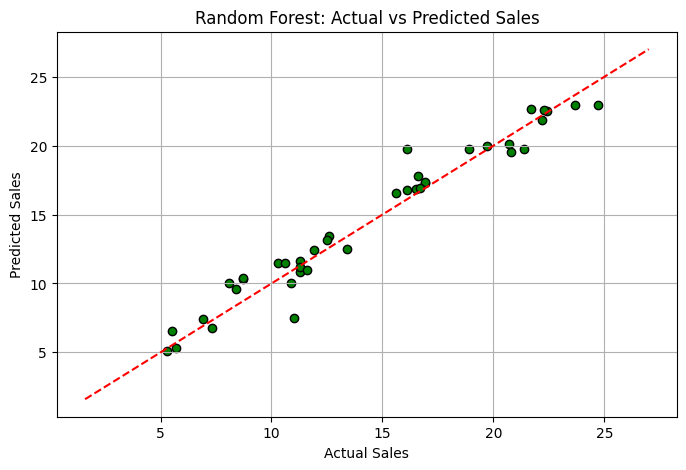

In [16]:
# Visualize Random Forest Predictions

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, color='green', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.grid(True)
plt.show()


### PHASE 5: Prediction on New/Unseen Data

In [17]:
# Predict on new unseen data

new_data = pd.DataFrame({
    'TV': [100, 150, 200],
    'Radio': [20, 30, 10],
    'Newspaper': [10, 5, 0]
})

new_predictions = rf_model.predict(new_data)

new_data['Predicted Sales'] = new_predictions
new_data


,TV,Radio,Newspaper,Predicted Sales
0,100,20,10,12.829
1,150,30,5,15.750
2,200,10,0,17.771
